In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [4]:
df = pd.read_csv(r"C:\Users\kavir\OneDrive\Documents\GitHub\Enhancing-Public-Health-by-Identifying-Unhealthy-Foods-Promoting-Healthier-Alternatives\datasets\cleaned_final_dataset.csv")

df['healthy'] = (df['calories'] < 120).astype(int)

features = ['protein', 'fat']
X = df[features]
y_class = df['healthy']     
y_reg = df['calories']        

LR

Linear Regression R²: 0.16
MSE: 30983.91


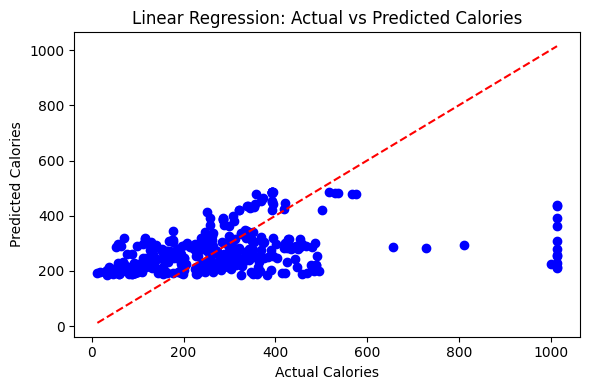

In [5]:
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X, y_reg, test_size=0.3, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train_lr, y_train_lr)
y_pred_lr = lr_model.predict(X_test_lr)

mse = mean_squared_error(y_test_lr, y_pred_lr)
r2 = r2_score(y_test_lr, y_pred_lr)
print("Linear Regression R²:", round(r2, 2))
print("MSE:", round(mse, 2))

plt.figure(figsize=(6, 4))
plt.scatter(y_test_lr, y_pred_lr, color='blue')
plt.plot([y_test_lr.min(), y_test_lr.max()], [y_test_lr.min(), y_test_lr.max()], 'r--')
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("Linear Regression: Actual vs Predicted Calories")
plt.tight_layout()
plt.show()


Logistic Regression Accuracy: 0.82


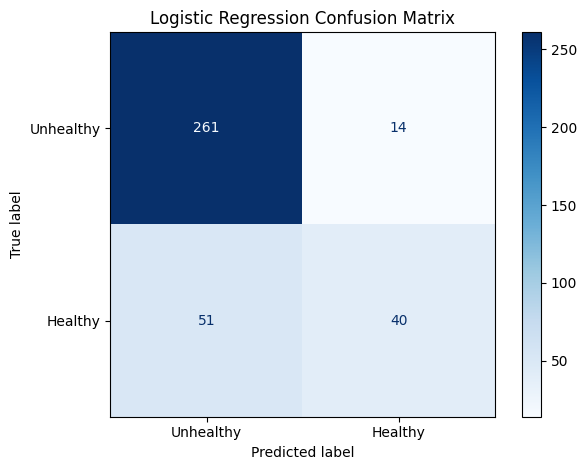

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_scaled, y_class, test_size=0.3, random_state=42)

log_model = LogisticRegression()
log_model.fit(X_train_log, y_train_log)
y_pred_log = log_model.predict(X_test_log)

log_acc = accuracy_score(y_test_log, y_pred_log)
log_cm = confusion_matrix(y_test_log, y_pred_log)

print("Logistic Regression Accuracy:", round(log_acc, 2))

disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=['Unhealthy', 'Healthy'])
disp.plot(cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.tight_layout()
plt.show()

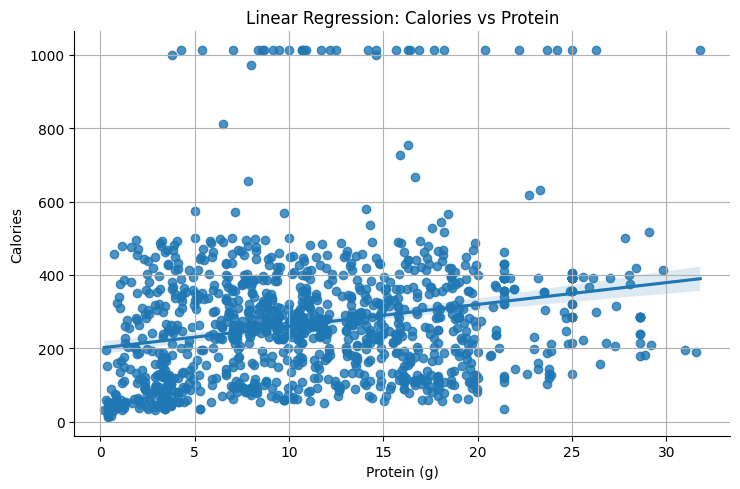

In [7]:
df = df.dropna(subset=['calories', 'protein', 'fat', 'carbohydrates'])

sns.lmplot(data=df, x="protein", y="calories", height=5, aspect=1.5)
plt.title("Linear Regression: Calories vs Protein")
plt.xlabel("Protein (g)")
plt.ylabel("Calories")
plt.grid(True)
plt.tight_layout()
plt.show()

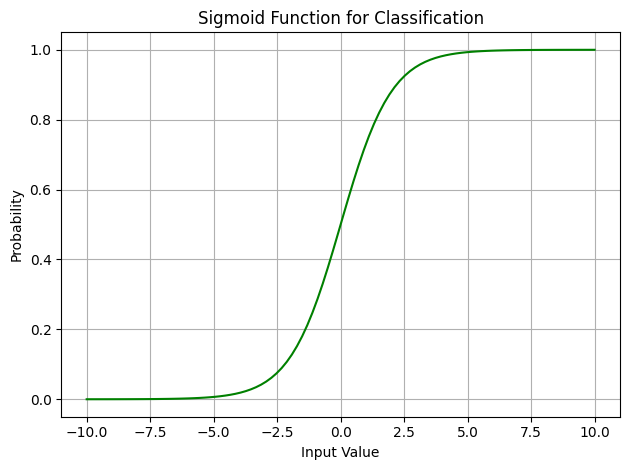

In [8]:
x = np.linspace(-10, 10, 100)
sigmoid = 1 / (1 + np.exp(-x))
plt.figure()
plt.plot(x, sigmoid, color='green')
plt.title("Sigmoid Function for Classification")
plt.xlabel("Input Value")
plt.ylabel("Probability")
plt.grid(True)
plt.tight_layout()
plt.show()

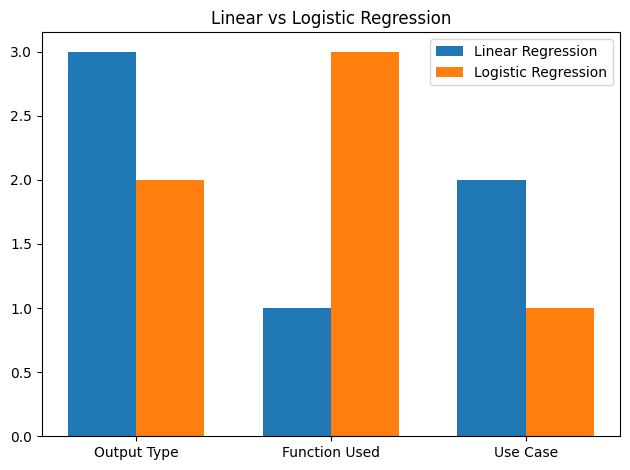

In [9]:
categories = ['Output Type', 'Function Used', 'Use Case']
linear = [3, 1, 2]   # Continuous, None, Regression
logistic = [2, 3, 1] # Probability, Sigmoid, Classification

x_labels = categories
x = np.arange(len(x_labels))
bar_width = 0.35

plt.figure()
plt.bar(x - bar_width/2, linear, bar_width, label='Linear Regression')
plt.bar(x + bar_width/2, logistic, bar_width, label='Logistic Regression')
plt.xticks(x, x_labels)
plt.title("Linear vs Logistic Regression")
plt.legend()
plt.tight_layout()
plt.show()

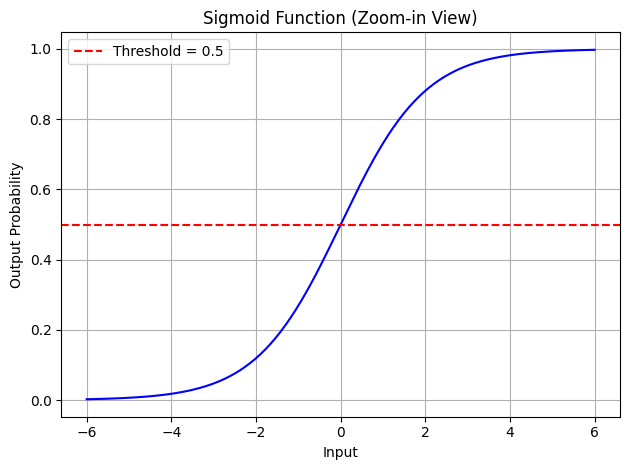

In [10]:
x = np.linspace(-6, 6, 200)
sigmoid = 1 / (1 + np.exp(-x))
plt.figure()
plt.plot(x, sigmoid, 'b-')
plt.axhline(0.5, color='red', linestyle='--', label='Threshold = 0.5')
plt.title("Sigmoid Function (Zoom-in View)")
plt.xlabel("Input")
plt.ylabel("Output Probability")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

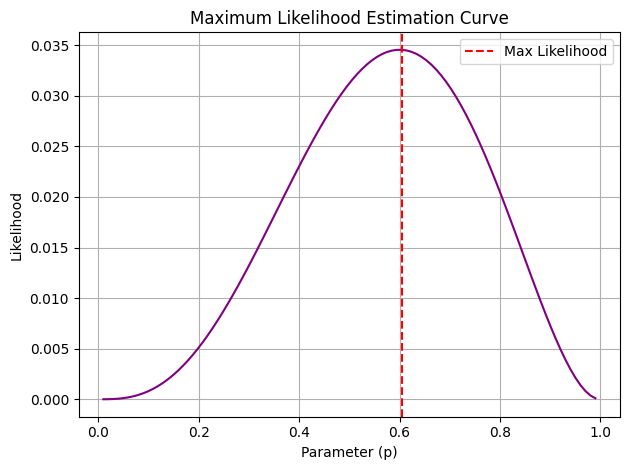

In [11]:
x = np.linspace(0.01, 0.99, 100)
likelihood = x**3 * (1 - x)**2
plt.figure()
plt.plot(x, likelihood, color='purple')
plt.title("Maximum Likelihood Estimation Curve")
plt.xlabel("Parameter (p)")
plt.ylabel("Likelihood")
plt.axvline(x[np.argmax(likelihood)], color='red', linestyle='--', label='Max Likelihood')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
print("Sample Linear Regression - Training Data:")
print(X_train_lr.head())
print("\nTraining Labels:")
print(y_train_lr.head())

print("\nSample Linear Regression - Testing Data:")
print(X_test_lr.head())
print("\nTesting Labels:")
print(y_test_lr.head())


Sample Linear Regression - Training Data:
      protein    fat
631     17.00   0.85
215     18.60  23.30
453      9.38   3.12
27       4.17   2.08
1175    14.63  13.92

Training Labels:
631     102.0
215     395.0
453     250.0
27       54.0
1175    327.0
Name: calories, dtype: float64

Sample Linear Regression - Testing Data:
      protein    fat
542     16.10   2.68
259      8.26   1.83
43       0.57   1.20
1009    15.63   9.64
753      2.82  12.87

Testing Labels:
542     107.0
259     390.0
43       43.0
1009    239.0
753     420.0
Name: calories, dtype: float64


In [13]:
print("Sample Logistic Regression - Training Data (Scaled):")
print(pd.DataFrame(X_train_log, columns=X.columns).head())
print("\nTraining Labels:")
print(y_train_log.head())

print("\nSample Logistic Regression - Testing Data (Scaled):")
print(pd.DataFrame(X_test_log, columns=X.columns).head())
print("\nTesting Labels:")
print(y_test_log.head())


Sample Logistic Regression - Training Data (Scaled):
    protein       fat
0  0.827870 -0.963042
1  1.059299  1.773773
2 -0.274307 -0.686313
3 -1.027896 -0.813096
4  0.485067  0.630284

Training Labels:
631     1
215     0
453     0
27      1
1175    0
Name: healthy, dtype: int64

Sample Logistic Regression - Testing Data (Scaled):
    protein       fat
0  0.697692 -0.739952
1 -0.436307 -0.843573
2 -1.548610 -0.920374
3  0.629710  0.108522
4 -1.223164  0.502282

Testing Labels:
542     1
259     0
43      1
1009    0
753     0
Name: healthy, dtype: int64


In [14]:
with open("model_metrics_Regression.json", "w") as f:
    json.dump({
        "accuracy": log_acc,
        "confusion_matrix": log_cm.tolist()
    }, f)
